## Importing required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import cv2
import os
import librosa.display
import IPython.display as ipd
from PIL import Image
import pickle
from sklearn.model_selection import train_test_split


## Defining a function that creates spectogram

In [7]:
def create_spectrogram(y):
    spec=librosa.feature.melspectrogram(y=y)
    spec_conv=librosa.amplitude_to_db(spec, ref=np.max)
    return spec_conv

Lets create paths...

In [8]:
audio_path="./audio/fold"
audio_files=[]
converted_list=[]
converted_outputs=[]
for i in range(10):
    audio_clips = os.listdir(audio_path+str(i+1))
    audio_files.append(audio_clips)

## Visualizing Audio Waves

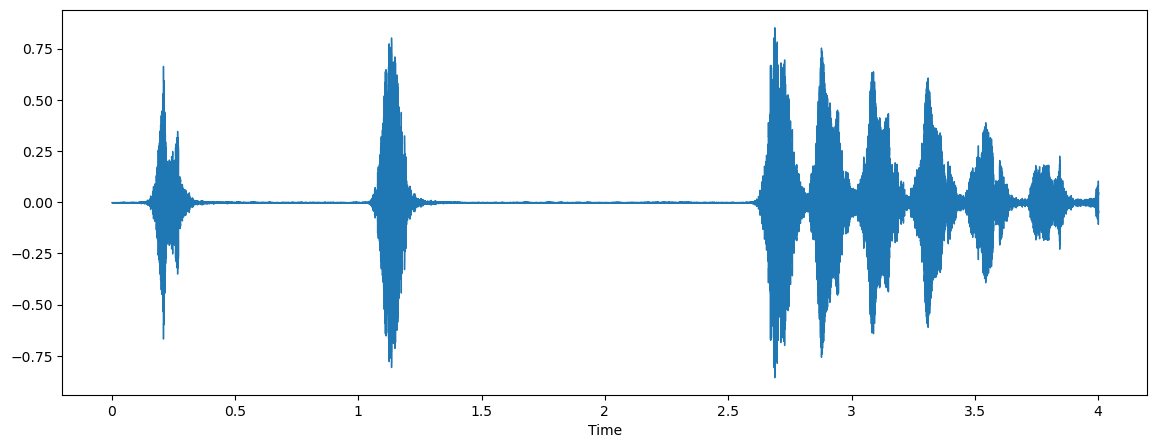

In [9]:
x, sr = librosa.load(audio_path+"1/"+audio_files[0][0])
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

## Saving spectogram images as matplotlib object

C:\Users\ozano\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
C:\Users\ozano\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
C:\Users\ozano\anaconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


Part 1 completed
Part 2 completed
Part 3 completed
Part 4 completed
Part 5 completed
Part 6 completed
Part 7 completed
Part 8 completed
Part 9 completed
Part 10 completed


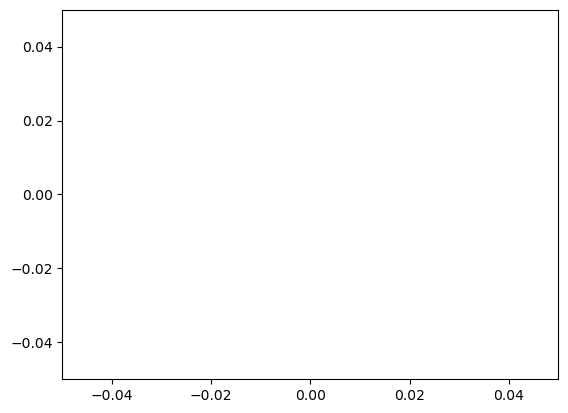

In [12]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
i=1
for item in audio_files:
    x=1
    for audio in item:
        audio_file, sr= librosa.load(audio_path+str(i)+"/"+audio)
        converted_outputs.append([audio.split("-")[1]])
        converted_audio=create_spectrogram(audio_file)
        fig = plt.Figure()
        canvas = FigureCanvas(fig)
        plt.margins(0,0)
        ax = fig.add_subplot(111)
        p = librosa.display.specshow(converted_audio, ax=ax, sr=sr)
        fig.savefig("./converted_audio/"+audio+".png", bbox_inches='tight', pad_inches=0.0)
        x=x+1
    print(f"Part {i} completed")
    i=i+1

In [13]:
print("Finished")


Finished


## Preprocessing 

In [14]:
inputs=os.listdir("./converted_audio")
i=1
print("Converting process of the images is started")
for input in inputs:
    image=cv2.imread("./converted_audio/"+input)
    gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("./converted_audio/"+input, cv2.resize(gray_image, (128, 128)))
    i=i+1
print("Converting process of the images is finished")

Converting process of the images is started
Converting process of the images is finished


## Train Validation And Test Split

In [16]:
inputs=os.listdir("./converted_audio")
outputs=[]
np.save("outputs.npy", outputs)
new_inputs=[]
for i in range(len(inputs)):
    outputs.append([int(inputs[i].split("-")[1])])
    image=Image.open("./converted_audio/"+inputs[i])
    arr=np.asarray(image)
    new_inputs.append(arr/255)
outputs=np.array(outputs).astype(int)
inputs=np.array(new_inputs)
X_train, X_test, y_train, y_test=train_test_split(inputs, outputs, random_state=42, test_size=0.2)
X_val, X_test, y_val, y_test=train_test_split(X_test, y_test, test_size=0.5)
print("Check if count of all train, validation and test set datas equal to total data")
print(f"Total of all splitted data: {len(X_train)+len(X_val)+len(X_test)}")
print(f"Total of datas do exist: {len(inputs)}")
my_dataset=(X_train, y_train, X_val, y_val, X_test, y_test)
f=open('dataset.pickle', "wb")
pickle.dump(my_dataset, f)
print("Process completed")
    

Check if count of all train, validation and test set datas equal to total data
Total of all splitted data: 8732
Total of datas do exist: 8732
Process completed


In [18]:
f.close()

In [17]:
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_test: (874, 128, 128)
Shape of y_test: (874, 1)
Shape of X_val: (873, 128, 128)
Shape of y_val: (873, 1)
Shape of X_train: (6985, 128, 128)
Shape of y_train: (6985, 1)
